In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
df = pd.read_csv('drug200.csv')

# Understanding Dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [15]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [18]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [16]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [17]:
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [19]:
df.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [20]:
df.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

# Data Cleaning

In [37]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [38]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

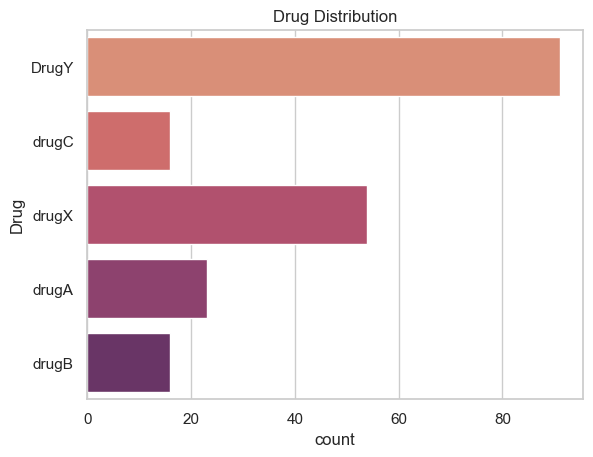

In [40]:
sns.set_theme(style="whitegrid")
sns.countplot(y='Drug', data=df, hue='Drug', palette='flare')
plt.title('Drug Distribution')
plt.show()

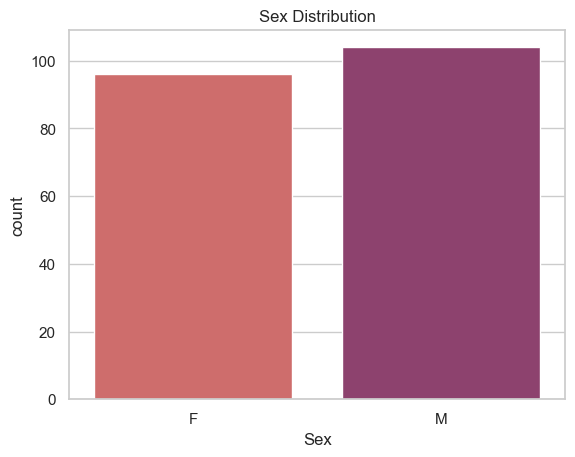

In [43]:
sns.set_theme(style="whitegrid")
sns.countplot(x='Sex', data=df, hue='Sex', palette='flare')
plt.title('Sex Distribution')
plt.show()

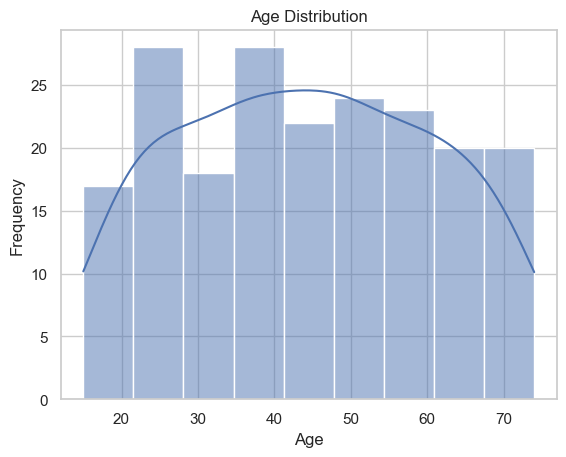

In [44]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Data Preparation

In [45]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

In [50]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


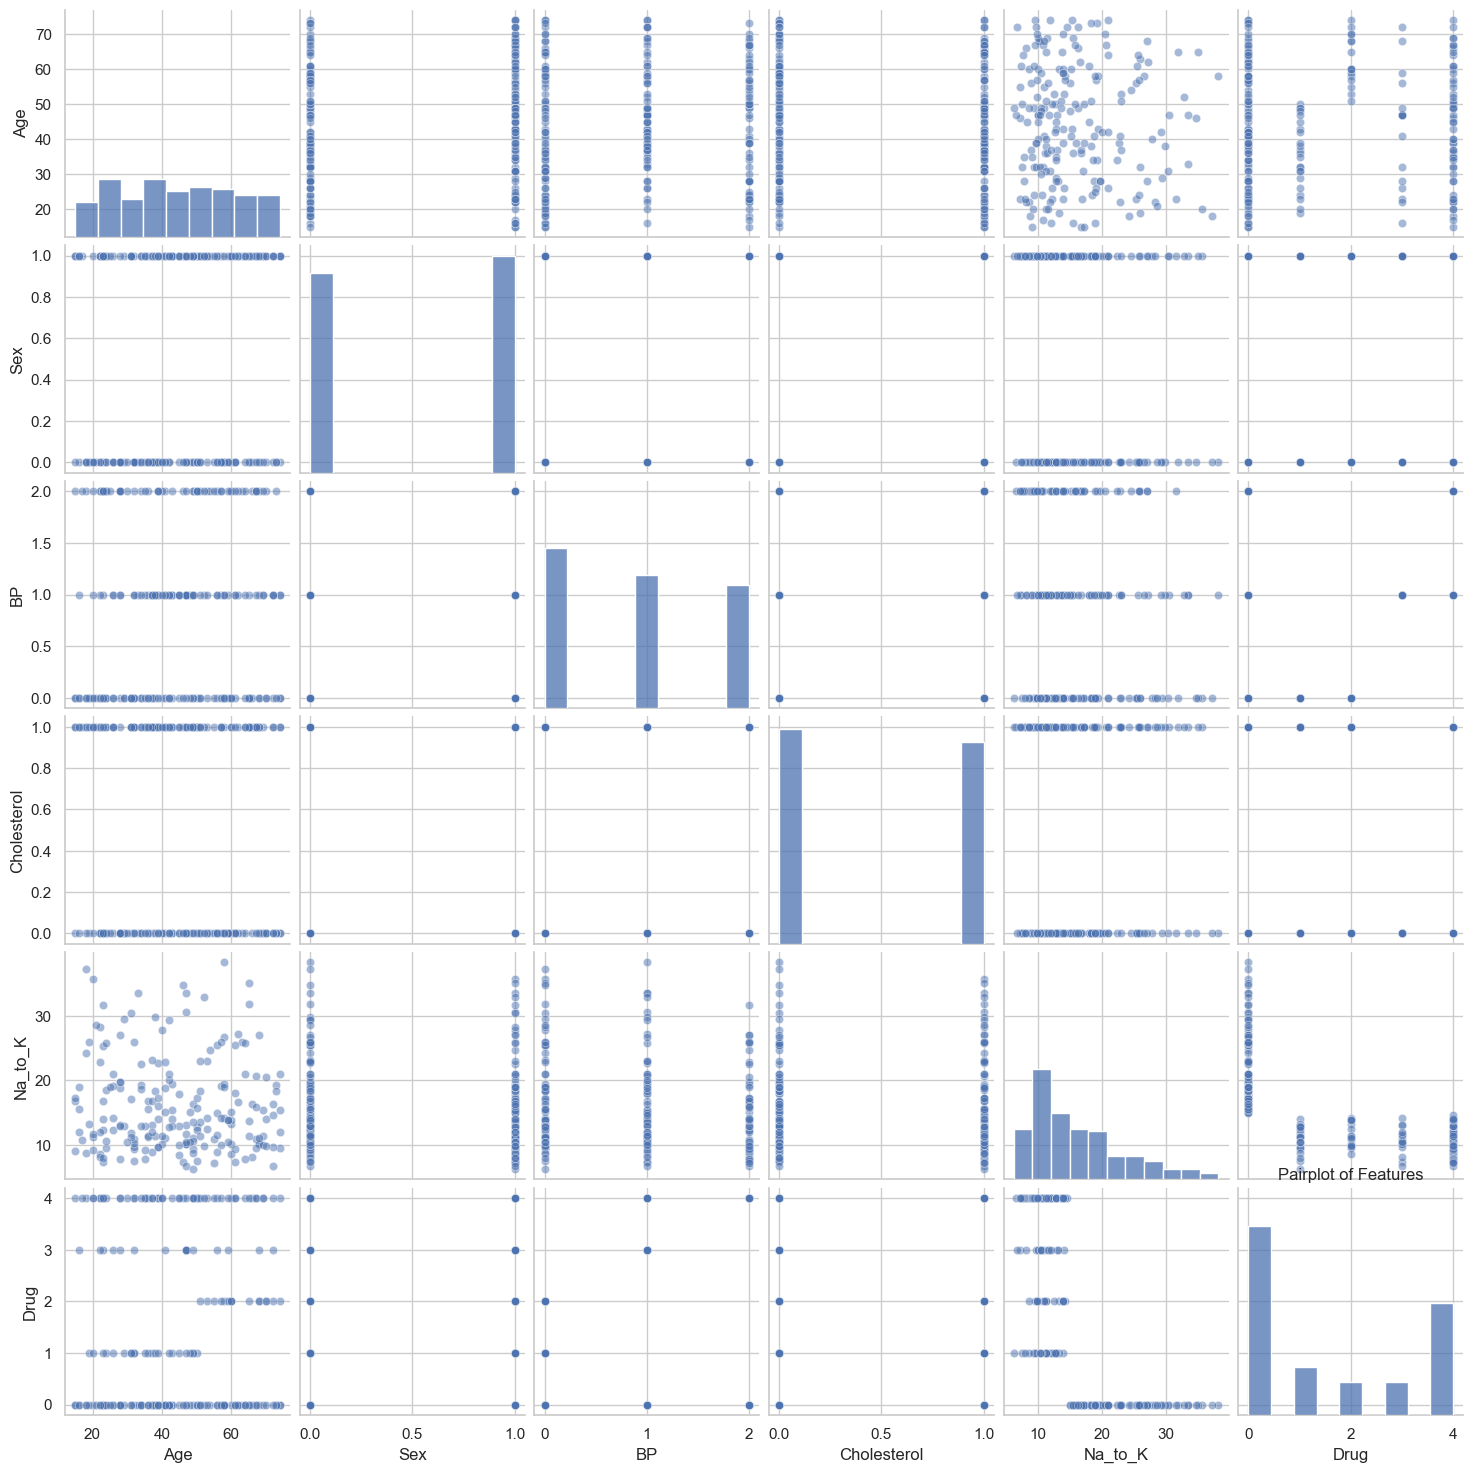

In [54]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.5})
plt.title('Pairplot of Features')  
plt.show()

In [57]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [58]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((160, 5), (160,), (40, 5), (40,))

# Modeling

In [74]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [75]:
y_pred = knn.predict(Xtest)

In [76]:
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.78


In [77]:
class_report = classification_report(ytest, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.83      0.67         6
           2       0.50      0.67      0.57         3
           3       1.00      0.20      0.33         5
           4       0.73      0.73      0.73        11

    accuracy                           0.78        40
   macro avg       0.76      0.69      0.66        40
weighted avg       0.82      0.78      0.76        40



In [78]:
testing = {
    'Age' : [50],
    'Sex' : [1],
    'BP' : [1],
    'Cholesterol' : [1],
    'Na_to_K' : [15.0]
}

testing = pd.DataFrame(testing)
testing

,Age,Sex,BP,Cholesterol,Na_to_K
0,50,1,1,1,15.0


In [79]:
pred_test = knn.predict(testing)
pred_test_label = le.inverse_transform(pred_test)
print(f'Predicted Drug for test input: {pred_test_label[0]}')

Predicted Drug for test input: DrugY
